<a href="https://colab.research.google.com/github/chandan2311/Reuters-Multilayer-Perceptron-Model/blob/main/Reuters_Multilayer_Perceptron_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print("Tensorflow Version:",tf.__version__)

Tensorflow Version: 2.12.0


In [ ]:
(X_train,y_train),(X_test,y_test)=reuters.load_data(num_words=10000,test_split=0.2)

In [ ]:
print(len(X_train),"Training example:")
print(len(X_test),"Testing example:")

8982 Training example:
2246 Testing example:


In [ ]:
num_classes=np.max(y_train) + 1
print(num_classes,"Number of classes")

46 Number of classes


In [ ]:
tokenizer=Tokenizer(num_words=10000)
X_train=tokenizer.sequences_to_matrix(X_train,mode='binary')
X_test=tokenizer.sequences_to_matrix(X_test,mode='binary')
X_train.shape,X_test.shape

((8982, 10000), (2246, 10000))

In [ ]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes) #oneshot encoding
y_test=tf.keras.utils.to_categorical(y_test,num_classes) #oneshot encoding

In [ ]:
y_test.shape,y_train.shape

((2246, 46), (8982, 46))

In [ ]:
model=Sequential([
    Dense(units=512,input_shape=(10000,)),
    Activation('relu'),
    Dropout(0.5),
    Dense(units=256),
    Activation('relu'),
    Dropout(0.5),
    Dense(units=46),
    Activation('softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               5120512   
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 46)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping# to avoid undefitting
es =EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='min')

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.1,callbacks=[es])

Epoch 1/100
253/253 [==============================] - 11s 41ms/step - loss: 1.5113 - accuracy: 0.6615 - val_loss: 1.1074 - val_accuracy: 0.7575
Epoch 2/100
253/253 [==============================] - 10s 41ms/step - loss: 0.8296 - accuracy: 0.8070 - val_loss: 0.9946 - val_accuracy: 0.7864
Epoch 3/100
253/253 [==============================] - 10s 41ms/step - loss: 0.5333 - accuracy: 0.8718 - val_loss: 0.9478 - val_accuracy: 0.8065
Epoch 4/100
253/253 [==============================] - 10s 40ms/step - loss: 0.3944 - accuracy: 0.9073 - val_loss: 1.0059 - val_accuracy: 0.7942
Epoch 5/100
253/253 [==============================] - 10s 40ms/step - loss: 0.3222 - accuracy: 0.9245 - val_loss: 0.9450 - val_accuracy: 0.8098
Epoch 6/100
253/253 [==============================] - 10s 41ms/step - loss: 0.2551 - accuracy: 0.9383 - val_loss: 1.0761 - val_accuracy: 0.7998
Epoch 7/100
253/253 [==============================] - 10s 41ms/step - loss: 0.2518 - accuracy: 0.9402 - val_loss: 1.0625 - val_ac

In [ ]:
model.evaluate(X_test,y_test,batch_size=32,verbose=1)

71/71 [==============================] - 1s 9ms/step - loss: 1.0504 - accuracy: 0.8072


[1.050422191619873, 0.8072128295898438]

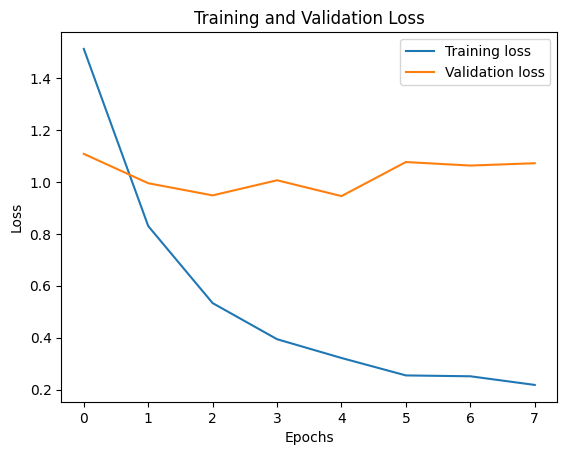

In [ ]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

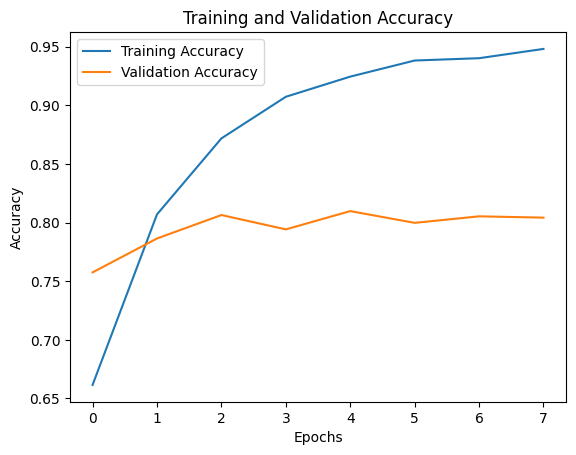

In [ ]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()